# 필요한 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as spst
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # matplotlib style 설정

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\박수빈\AppData\Local\Temp\ipykernel_2936\1734918822.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # matplotlib style 설정


# 데이터 파일 불러오기

In [2]:
customer = pd.read_csv("./data file/olist_customers.csv")
order = pd.read_csv("./data file/olist_orders.csv")
item = pd.read_csv("./data file/olist_order_items.csv")
payment = pd.read_csv("./data file/olist_order_payments.csv")
product = pd.read_csv("./data file/olist_products.csv")
category = pd.read_csv("./data file/product_category_name_translation.csv")

In [3]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   seller_id      112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.3+ MB


# 필요한 데이터끼리 병합

customer --(customer_id)-- order --(order_id)-- order_item --(order_id)-- payment  

order_item --(product_id)-- product --(product_category_name)-- category_name_translation

In [4]:
customer_order = pd.merge(customer, order, on='customer_id', how='left')
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00


In [5]:
customer_order['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

## 고객 별 누적 구매 횟수 열 'total_visits' 추가

In [6]:
customer_order['total_visits'] = customer_order.groupby('customer_unique_id')['customer_unique_id'].transform('count')
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1


In [7]:
customer_order.groupby('total_visits')['total_visits'].count()

total_visits
1     93099
2      5490
3       609
4       120
5        40
6        36
7        21
9         9
17       17
Name: total_visits, dtype: int64

In [8]:
customer_order_item = pd.merge(customer_order, item, on="order_id", how='left')
customer_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07


## 고객 별 누적 구매 물품 수 'total_items' 추가

In [9]:
customer_order_item['total_items'] = customer_order_item.groupby('customer_unique_id')['customer_unique_id'].transform('count')
customer_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value,total_items
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1


In [10]:
customer_order_item.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

## 고객 별 누적 구매금액 'total_price' 추가

In [11]:
customer_order_item['total_price'] = customer_order_item.groupby('customer_unique_id')['price'].transform('sum')
customer_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value,total_items,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1,74.90
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1,114.90
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1,37.00
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1,689.00


In [12]:
customer_order_item_payment = pd.merge(customer_order_item, payment, on="order_id", how="left")
customer_order_item_payment

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value,total_items,total_price,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,124.99,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1,289.00,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,139.94,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,149.94,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1,230.00,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1,74.90,1.0,credit_card,6.0,88.78
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1,114.90,1.0,credit_card,3.0,129.06
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1,37.00,1.0,credit_card,5.0,56.04
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1,689.00,1.0,credit_card,2.0,711.07


In [13]:
customer_order_item_payment.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [14]:
customer_order_item_payment_product = pd.merge(customer_order_item_payment, product, on="product_id", how="left")
customer_order_item_payment_product

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,total_price,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,124.99,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,289.00,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,139.94,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,149.94,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,230.00,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,74.90,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,114.90,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,37.00,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,689.00,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0


In [15]:
customer_order_item_payment_product.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [16]:
df = pd.merge(customer_order_item_payment_product, category, on="product_category_name", how="left")
df

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


In [17]:
df.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [18]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_customer_date    3397
order_estimated_delivery_date       0
total_visits                        0
product_id                        830
seller_id                         830
price                             830
freight_value                     830
total_items                         0
total_price                         0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name            2528
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
product_category_name_english    2553
dtype: int64

# 'total_visits'가 1인 고객

In [18]:
df_1 = df.copy()
df_1

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


In [19]:
df_copy = df_1[df_1['total_visits']>1]
df_copy.groupby('total_visits')['total_visits'].count()

total_visits
2     6998
3      824
4      172
5       46
6       47
7       31
9       14
17      17
Name: total_visits, dtype: int64

In [20]:
df_1 = df_1[df_1['total_visits']==1]
df_1_copy = df_1.copy()

In [21]:
df_1_copy['order_purchase_timestamp'] = pd.to_datetime(df_1_copy['order_purchase_timestamp'])

# .dt 액세서를 사용하여 요일 추출
# 요일 추출 (월요일=0, 일요일=6)
df_1_copy['day_of_week'] = df_1_copy['order_purchase_timestamp'].dt.dayofweek

df_1_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,day_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares,3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture,4
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest,4
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure,1
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty,5
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts,3


<Axes: xlabel='day_of_week', ylabel='count'>

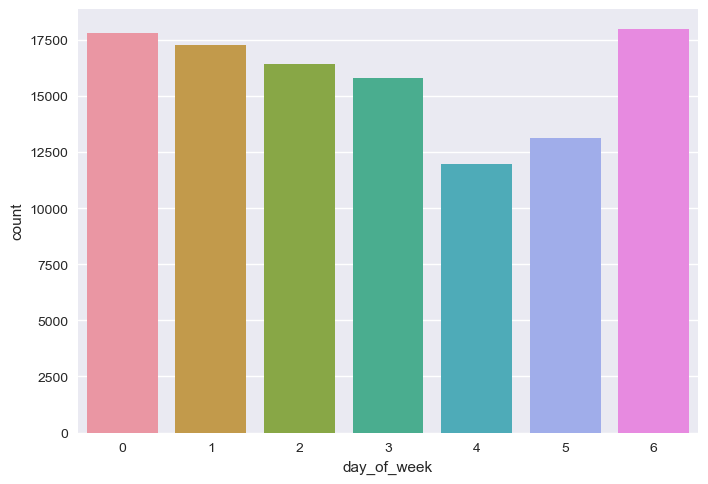

In [22]:
sns.countplot(data=df_1_copy,x='day_of_week')

# total_visits가 2회인 고객과 3회 이상인 고객 나누기

In [23]:
df_2 = df_copy[df_copy['total_visits']==2]
df_2.groupby('total_visits')['total_visits'].count()

total_visits
2    6998
Name: total_visits, dtype: int64

In [24]:
df_3 = df_copy[df_copy['total_visits']>2]
df_3.groupby('total_visits')['total_visits'].count()

total_visits
3     824
4     172
5      46
6      47
7      31
9      14
17     17
Name: total_visits, dtype: int64

# 재방문 시기

## 2회 방문자

In [25]:
df_2['order_purchase_timestamp'] = pd.to_datetime(df_2['order_purchase_timestamp'])
df_2['order_purchase_timestamp'] 

5        2022-09-14 18:14:31
8        2023-01-18 12:35:44
13       2023-03-07 15:57:14
35       2023-04-18 09:42:53
36       2022-06-14 18:31:54
                 ...        
118300   2023-06-20 14:16:20
118301   2023-06-20 14:16:20
118302   2023-06-20 14:16:20
118322   2023-05-15 10:39:41
118387   2023-01-24 17:53:44
Name: order_purchase_timestamp, Length: 6998, dtype: datetime64[ns]

In [26]:
first_visit = pd.DataFrame(df_2.groupby('customer_unique_id')['order_purchase_timestamp'].min())
first_visit

,order_purchase_timestamp
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,2023-07-28 00:23:49
004288347e5e88a27ded2bb23747066c,2022-07-27 14:13:03
004b45ec5c64187465168251cd1c9c2f,2022-09-01 12:11:23
0058f300f57d7b93c477a131a59b36c3,2023-02-19 17:11:34
00a39521eb40f7012db50455bf083460,2023-05-23 20:14:21
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-04-23 21:49:49
ff22e30958c13ffe219db7d711e8f564,2023-08-24 17:02:19
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54


In [27]:
second_visit = pd.DataFrame(df_2.groupby('customer_unique_id')['order_purchase_timestamp'].max())
second_visit

,order_purchase_timestamp
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,2023-08-13 09:14:07
004288347e5e88a27ded2bb23747066c,2023-01-14 07:36:54
004b45ec5c64187465168251cd1c9c2f,2023-05-26 19:42:48
0058f300f57d7b93c477a131a59b36c3,2023-03-22 18:09:41
00a39521eb40f7012db50455bf083460,2023-06-03 10:12:57
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-05-26 11:51:22
ff22e30958c13ffe219db7d711e8f564,2023-09-03 09:06:57
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54


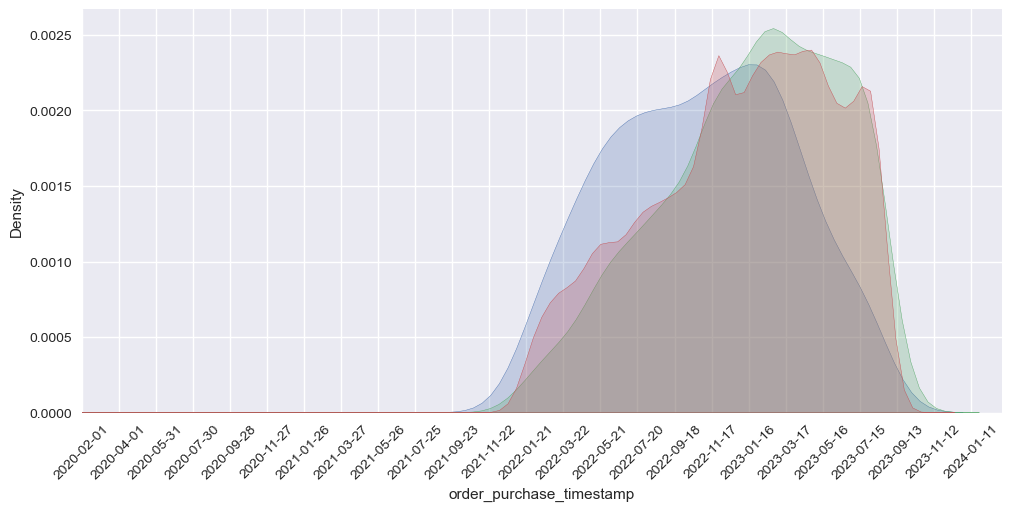

In [28]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.kdeplot(x='order_purchase_timestamp', data=first_visit,fill=True, ax=ax)
sns.kdeplot(x='order_purchase_timestamp', data=second_visit,fill=True, ax=ax)
sns.kdeplot(x='order_purchase_timestamp', data=df_1_copy,fill=True, ax=ax)
plt.xlim(pd.Timestamp('2020-02-01'), pd.Timestamp('2024-03-01'))

# 눈금 위치 생성: '2020-02-01'부터 '2024-03-01'까지 매 30일마다 눈금을 생성
ticks = pd.date_range(start='2020-02-01', end='2024-03-01', freq='60D')

# plt.xticks()에 눈금 위치와 눈금 라벨 설정
plt.xticks(ticks, ticks.strftime('%Y-%m-%d'), rotation=45)
plt.show()

In [29]:
# 고객별 최소 주문 시간
min_timestamps = df_2.groupby('customer_unique_id')['order_purchase_timestamp'].min().rename('first_purchase')

# 고객별 최대 주문 시간
max_timestamps = df_2.groupby('customer_unique_id')['order_purchase_timestamp'].max().rename('last_purchase')

# 두 Series를 하나의 DataFrame으로 병합
df_duration = pd.concat([min_timestamps, max_timestamps], axis=1)

# 재방문까지 걸린 시간 계산 (예: 일 단위로 계산)
df_duration['duration'] = df_duration['last_purchase'] - df_duration['first_purchase']

# 결과 확인
df_duration

,first_purchase,last_purchase,duration
customer_unique_id,,,
00172711b30d52eea8b313a7f2cced02,2023-07-28 00:23:49,2023-08-13 09:14:07,16 days 08:50:18
004288347e5e88a27ded2bb23747066c,2022-07-27 14:13:03,2023-01-14 07:36:54,170 days 17:23:51
004b45ec5c64187465168251cd1c9c2f,2022-09-01 12:11:23,2023-05-26 19:42:48,267 days 07:31:25
0058f300f57d7b93c477a131a59b36c3,2023-02-19 17:11:34,2023-03-22 18:09:41,31 days 00:58:07
00a39521eb40f7012db50455bf083460,2023-05-23 20:14:21,2023-06-03 10:12:57,10 days 13:58:36
...,...,...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-04-23 21:49:49,2023-05-26 11:51:22,32 days 14:01:33
ff22e30958c13ffe219db7d711e8f564,2023-08-24 17:02:19,2023-09-03 09:06:57,9 days 16:04:38
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54,2022-05-19 21:20:54,0 days 00:00:00


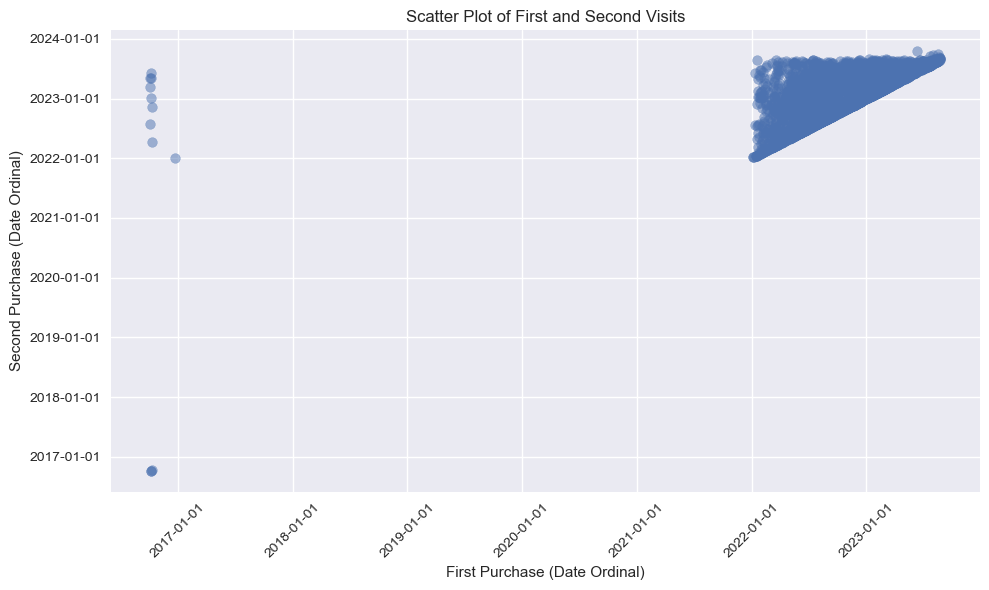

In [30]:
plt.figure(figsize=(10, 6))

# 산점도 그리기
plt.scatter(df_duration['first_purchase'], df_duration['last_purchase'], alpha=0.5)

plt.xlabel('First Purchase (Date Ordinal)')
plt.ylabel('Second Purchase (Date Ordinal)')
plt.title('Scatter Plot of First and Second Visits')

# x축과 y축에 날짜 표시를 위해 변환
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [31]:
df_duration['duration'].describe()

count                           2745
mean      87 days 04:48:21.765391621
std      164 days 17:01:22.351277096
min                  0 days 00:00:00
25%                  0 days 00:02:01
50%                 28 days 01:12:31
75%                125 days 22:39:41
max               2434 days 23:29:38
Name: duration, dtype: object

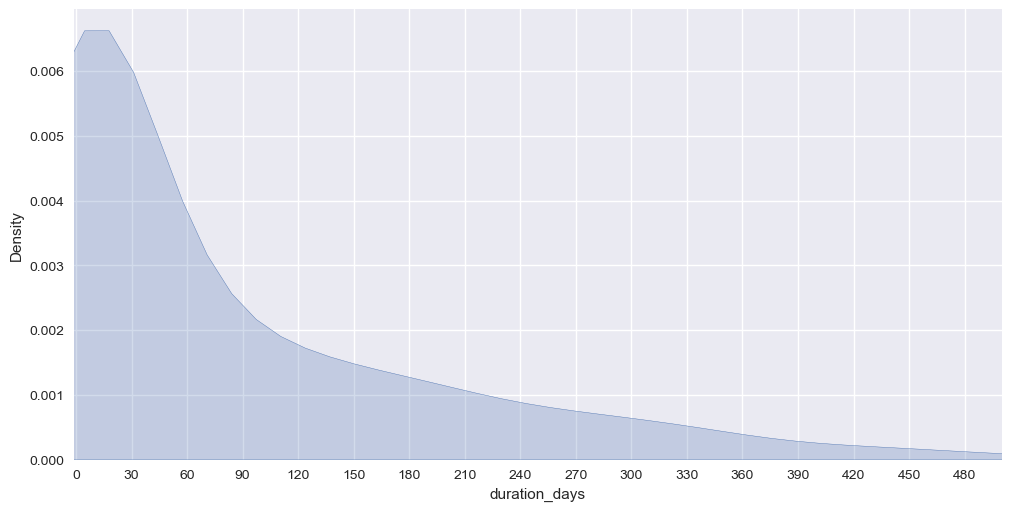

In [32]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
# duration을 일 단위로 변환
df_duration['duration_days'] = df_duration['duration'].dt.days

# KDE 플롯 그리기
sns.kdeplot(data=df_duration, x='duration_days', fill=True)

plt.xlim(-1,500)
plt.xticks(range(0, 500, 30))
plt.show()

In [33]:
df_2_copy = df_2.copy()

In [34]:
# .dt 액세서를 사용하여 요일 추출
# 요일 추출 (월요일=0, 일요일=6)
df_2_copy['day_of_week'] = df_2_copy['order_purchase_timestamp'].dt.dayofweek

df_2_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,day_of_week
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,2
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,2
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,1
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0


<Axes: xlabel='day_of_week', ylabel='count'>

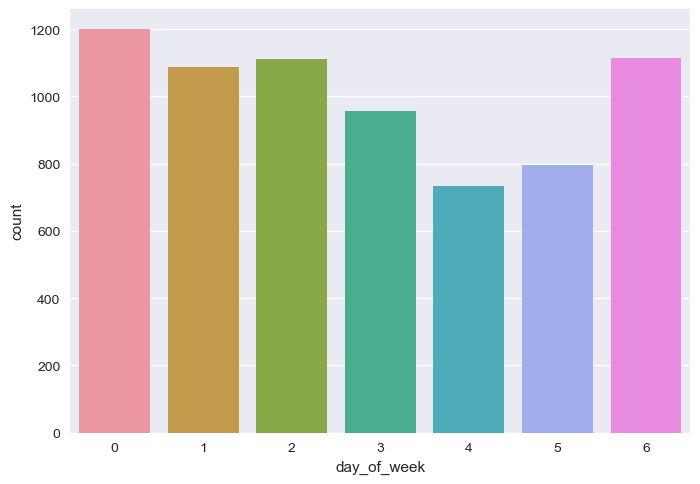

In [35]:
sns.countplot(data=df_2_copy,x='day_of_week')

## 3회 이상 방문자

In [36]:
df_3_copy = df_3.copy()
df_3_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
156,acca74d2a60c03b46a5256c02cef9244,f34cd7fd85a1f8baff886edf09567be3,89120,200331f78002771b79409a9cf7962dfa,delivered,2022-08-22 12:49:28,2022-08-22 13:07:26,2022-09-05 18:40:50,2022-09-18 00:00:00,4,...,1.0,credit_card,6.0,214.32,eletrodomesticos_2,11900.0,65.0,35.0,35.0,home_appliances_2
230,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,1.0,credit_card,1.0,310.69,casa_conforto,150.0,16.0,2.0,11.0,home_confort
231,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,1.0,credit_card,1.0,310.69,cama_mesa_banho,1100.0,38.0,10.0,38.0,bed_bath_table
232,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,1.0,credit_card,1.0,310.69,casa_conforto,150.0,16.0,2.0,11.0,home_confort
233,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,1.0,credit_card,1.0,310.69,moveis_decoracao,300.0,18.0,9.0,14.0,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117924,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,1.0,boleto,1.0,209.91,ferramentas_jardim,1500.0,30.0,22.0,30.0,garden_tools
117925,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,1.0,boleto,1.0,209.91,ferramentas_jardim,1650.0,30.0,22.0,30.0,garden_tools
117926,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,1.0,boleto,1.0,209.91,ferramentas_jardim,1750.0,37.0,22.0,40.0,garden_tools
117937,f8ead8fa77e496442ea34c58340a7f5a,c6df3869c263531ebd51f0454a353605,96020,99ed5bfea4c7e7191a2412698fc7abbb,delivered,2022-03-04 10:22:53,2022-03-07 04:23:25,2022-03-22 10:16:01,2022-04-12 00:00:00,3,...,1.0,boleto,1.0,29.95,cama_mesa_banho,200.0,30.0,4.0,40.0,bed_bath_table


In [37]:
df_3_copy['order_purchase_timestamp'] = pd.to_datetime(df_3_copy['order_purchase_timestamp'])

# .dt 액세서를 사용하여 요일 추출
# 요일 추출 (월요일=0, 일요일=6)
df_3_copy['day_of_week'] = df_3_copy['order_purchase_timestamp'].dt.dayofweek

df_3_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,day_of_week
156,acca74d2a60c03b46a5256c02cef9244,f34cd7fd85a1f8baff886edf09567be3,89120,200331f78002771b79409a9cf7962dfa,delivered,2022-08-22 12:49:28,2022-08-22 13:07:26,2022-09-05 18:40:50,2022-09-18 00:00:00,4,...,credit_card,6.0,214.32,eletrodomesticos_2,11900.0,65.0,35.0,35.0,home_appliances_2,0
230,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,credit_card,1.0,310.69,casa_conforto,150.0,16.0,2.0,11.0,home_confort,1
231,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,credit_card,1.0,310.69,cama_mesa_banho,1100.0,38.0,10.0,38.0,bed_bath_table,1
232,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,credit_card,1.0,310.69,casa_conforto,150.0,16.0,2.0,11.0,home_confort,1
233,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,d839ea07a528e914f89702508023da37,delivered,2022-10-11 14:49:49,2022-10-11 15:08:32,2022-10-17 21:56:01,2022-11-03 00:00:00,3,...,credit_card,1.0,310.69,moveis_decoracao,300.0,18.0,9.0,14.0,furniture_decor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117924,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,boleto,1.0,209.91,ferramentas_jardim,1500.0,30.0,22.0,30.0,garden_tools,3
117925,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,boleto,1.0,209.91,ferramentas_jardim,1650.0,30.0,22.0,30.0,garden_tools,3
117926,84c17812858f1155ffcb307ef1ece533,a029899dd8534557a81c369475ff80c8,75650,c1ff65479834ffeb424c5a78cd65ce4c,delivered,2023-04-27 13:36:40,2023-05-01 05:32:23,2023-05-10 20:47:06,2023-05-28 00:00:00,3,...,boleto,1.0,209.91,ferramentas_jardim,1750.0,37.0,22.0,40.0,garden_tools,3
117937,f8ead8fa77e496442ea34c58340a7f5a,c6df3869c263531ebd51f0454a353605,96020,99ed5bfea4c7e7191a2412698fc7abbb,delivered,2022-03-04 10:22:53,2022-03-07 04:23:25,2022-03-22 10:16:01,2022-04-12 00:00:00,3,...,boleto,1.0,29.95,cama_mesa_banho,200.0,30.0,4.0,40.0,bed_bath_table,4


In [38]:
df_3_copy['day_of_week'].value_counts()

day_of_week
2    211
0    196
1    196
6    164
3    151
5    119
4    114
Name: count, dtype: int64

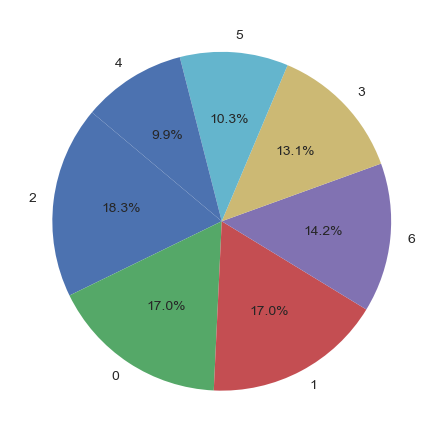

In [39]:
day_counts = df_3_copy['day_of_week'].value_counts()
plt.pie(day_counts, labels=day_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.show()

<Axes: xlabel='day_of_week', ylabel='count'>

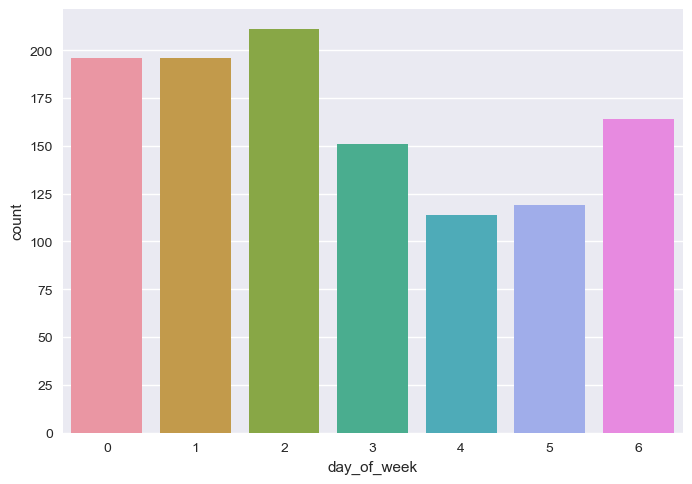

In [40]:
sns.countplot(data=df_3_copy,x='day_of_week')

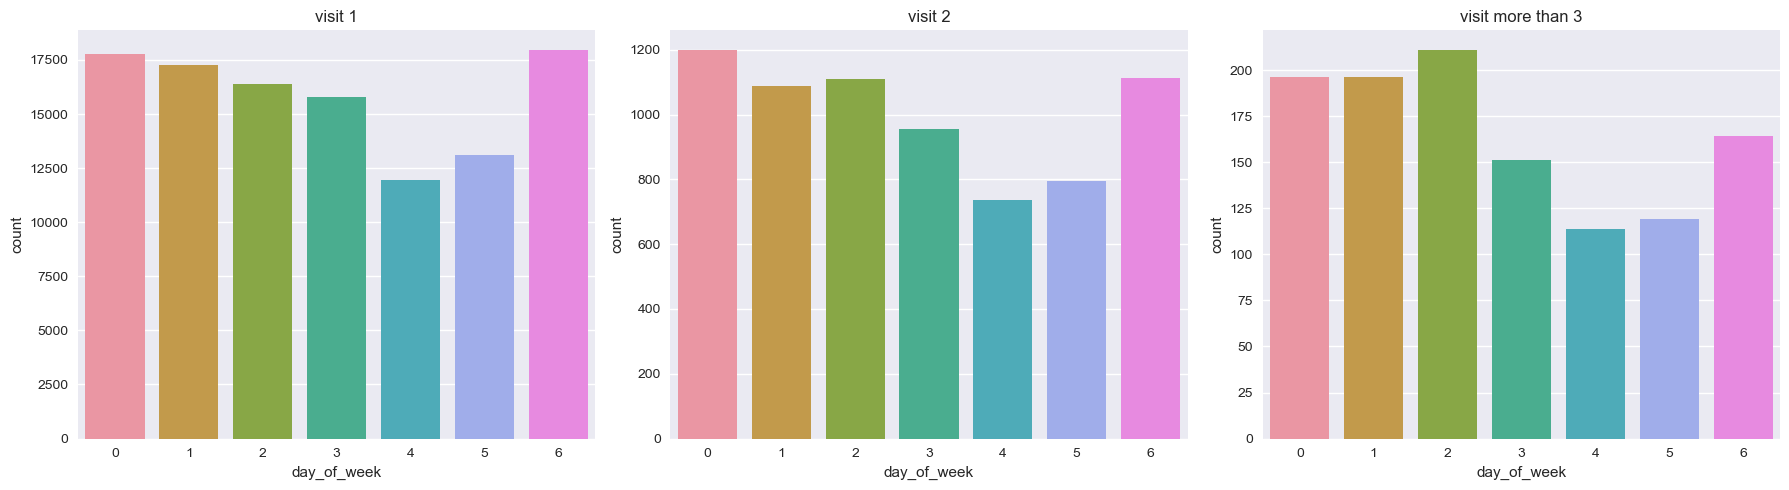

In [41]:
# 3개의 서브플롯을 만들기 위한 준비
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1행 3열의 서브플롯 구성

# 첫 번째 서브플롯에 category에 대한 countplot 그리기
sns.countplot(x='day_of_week', data=df_1_copy, ax=axes[0])
axes[0].set_title('visit 1')

# 두 번째 서브플롯에 region에 대한 countplot 그리기
sns.countplot(x='day_of_week', data=df_2_copy, ax=axes[1])
axes[1].set_title('visit 2')

# 세 번째 서브플롯에 sales_channel에 대한 countplot 그리기
sns.countplot(x='day_of_week', data=df_3_copy, ax=axes[2])
axes[2].set_title('visit more than 3')

plt.tight_layout() # 서브플롯들 사이에 적절한 간격 유지
plt.show()

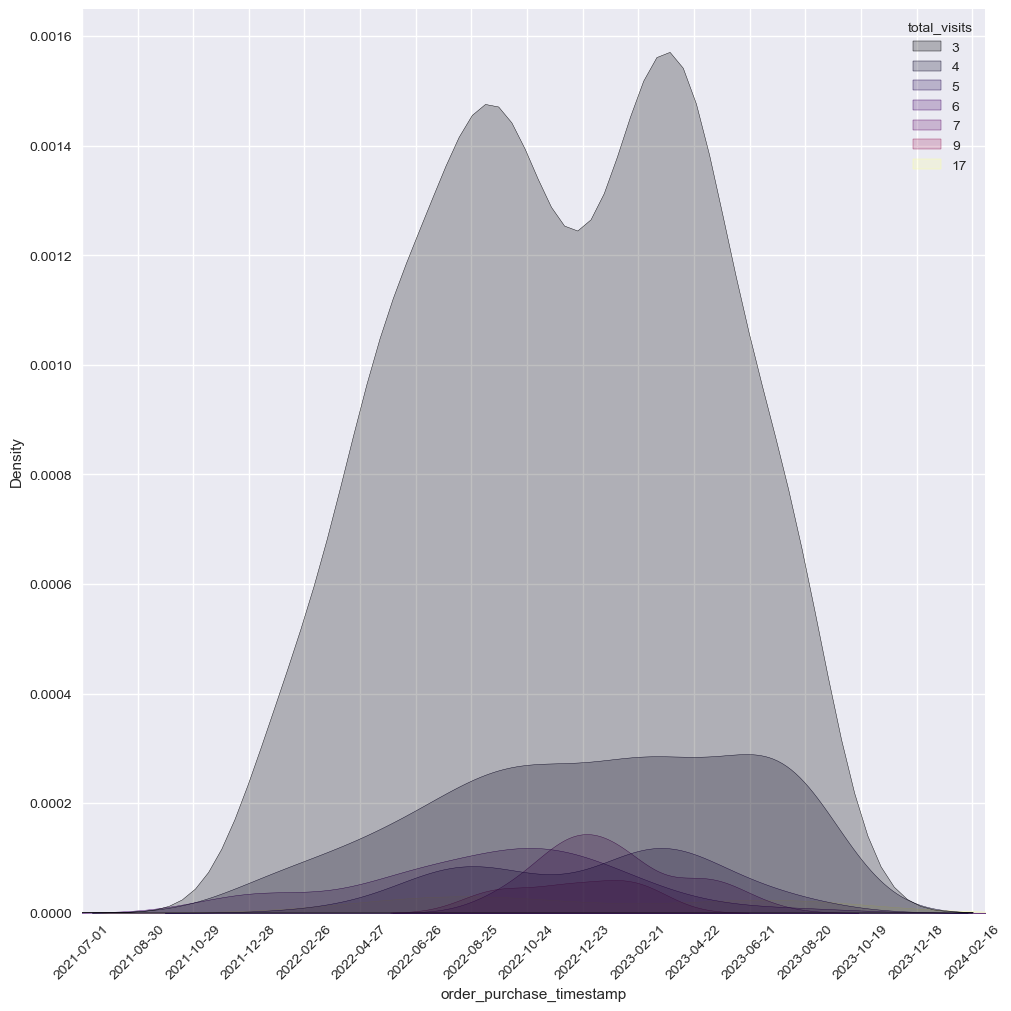

In [42]:
fig, ax = plt.subplots(figsize=(10,10),constrained_layout=True)

df_copy['order_purchase_timestamp'] = pd.to_datetime(df_copy['order_purchase_timestamp'])

sns.kdeplot(x='order_purchase_timestamp', data=df_3_copy,fill=True, palette='inferno',hue='total_visits',ax=ax)
plt.xlim(pd.Timestamp('2021-07-01'), pd.Timestamp('2024-03-01'))

# 눈금 위치 생성: '2020-02-01'부터 '2024-03-01'까지 매 60일마다 눈금을 생성
ticks = pd.date_range(start='2021-07-01', end='2024-03-01', freq='60D')

# plt.xticks()에 눈금 위치와 눈금 라벨 설정
plt.xticks(ticks, ticks.strftime('%Y-%m-%d'), rotation=45)
plt.show()

# 구매품목

## 2회 방문자

In [43]:
df_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,1.0,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,1.0,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,1.0,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,1.0,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,1.0,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,1.0,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor


In [44]:
df_2['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table                           1027
furniture_decor                           788
sports_leisure                            620
health_beauty                             514
computers_accessories                     488
                                         ... 
tablets_printing_image                      2
fashion_sport                               1
small_appliances_home_oven_and_coffee       1
la_cuisine                                  1
fashion_childrens_clothes                   1
Name: count, Length: 67, dtype: int64

In [45]:
df_2['product_category_name_english'].describe()

count               6814
unique                67
top       bed_bath_table
freq                1027
Name: product_category_name_english, dtype: object

In [46]:
df_2_cat = pd.DataFrame(df_2['product_category_name_english'].value_counts()).reset_index()
df_2_cat.columns=['product_category_name_english','count']
df_2_cat.head(30)

,product_category_name_english,count
0,bed_bath_table,1027
1,furniture_decor,788
2,sports_leisure,620
3,health_beauty,514
4,computers_accessories,488
5,housewares,423
6,garden_tools,277
7,watches_gifts,271
8,fashion_bags_accessories,212
9,telephony,196


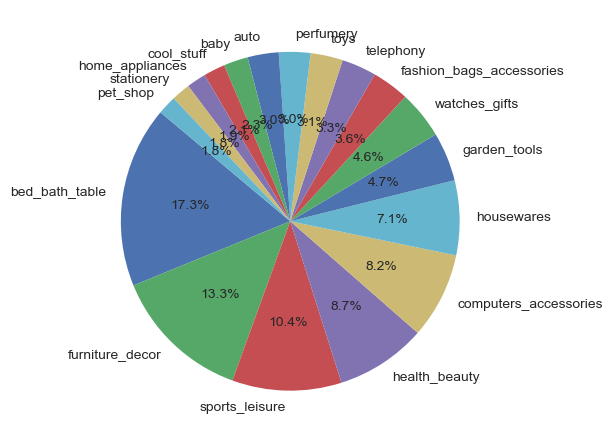

In [47]:
df_2_cat_top100 = df_2_cat[df_2_cat['count']>100]
plt.pie(df_2_cat_top100['count'], labels=df_2_cat_top100['product_category_name_english'], 
        autopct='%1.1f%%', startangle=140)
plt.show()

In [48]:
# 먼저, order_purchase_timestamp로 전체 데이터를 정렬
df_sorted = df_2.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])
df_2_cat_diff = pd.DataFrame(df_2.groupby('customer_unique_id')['product_category_name_english'].unique())
df_2_cat_diff

,product_category_name_english
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,"[stationery, nan]"
004288347e5e88a27ded2bb23747066c,"[cool_stuff, luggage_accessories]"
004b45ec5c64187465168251cd1c9c2f,"[garden_tools, furniture_decor]"
0058f300f57d7b93c477a131a59b36c3,"[luggage_accessories, stationery]"
00a39521eb40f7012db50455bf083460,"[sports_leisure, electronics]"
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty]
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture]
ff44401d0d8f5b9c54a47374eb48c1b8,[fashion_bags_accessories]


In [49]:
# 새로운 열을 생성하기 위해 apply 함수와 lambda 함수 사용
df_2_cat_diff['first_cat'] = df_2_cat_diff['product_category_name_english'].apply(lambda x: x[0] if len(x) >= 1 else None)
df_2_cat_diff['second_cat'] = df_2_cat_diff['product_category_name_english'].apply(lambda x: x[1] if len(x) >= 2 else x[0] if len(x) == 1 else None)
df_2_cat_diff

,product_category_name_english,first_cat,second_cat
customer_unique_id,,,
00172711b30d52eea8b313a7f2cced02,"[stationery, nan]",stationery,NaN
004288347e5e88a27ded2bb23747066c,"[cool_stuff, luggage_accessories]",cool_stuff,luggage_accessories
004b45ec5c64187465168251cd1c9c2f,"[garden_tools, furniture_decor]",garden_tools,furniture_decor
0058f300f57d7b93c477a131a59b36c3,"[luggage_accessories, stationery]",luggage_accessories,stationery
00a39521eb40f7012db50455bf083460,"[sports_leisure, electronics]",sports_leisure,electronics
...,...,...,...
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty],health_beauty,health_beauty
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture],kitchen_dining_laundry_garden_furniture,kitchen_dining_laundry_garden_furniture
ff44401d0d8f5b9c54a47374eb48c1b8,[fashion_bags_accessories],fashion_bags_accessories,fashion_bags_accessories


In [50]:
df_2_cat_diff_single = df_2_cat_diff[df_2_cat_diff['product_category_name_english'].apply(len) == 1]
df_2_cat_diff_single

,product_category_name_english,first_cat,second_cat
customer_unique_id,,,
012a218df8995d3ec3bb221828360c86,[auto],auto,auto
013f4353d26bb05dc6652f1269458d8d,[sports_leisure],sports_leisure,sports_leisure
0178b244a5c281fb2ade54038dd4b161,[bed_bath_table],bed_bath_table,bed_bath_table
01886ef98f995e4f2dd75a1d04c97397,[health_beauty],health_beauty,health_beauty
018b5a7502c30eb5f230f1b4eb23a156,[fashion_bags_accessories],fashion_bags_accessories,fashion_bags_accessories
...,...,...,...
fe52c2abb172426dd6416cc69e6b3689,[bed_bath_table],bed_bath_table,bed_bath_table
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty],health_beauty,health_beauty
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture],kitchen_dining_laundry_garden_furniture,kitchen_dining_laundry_garden_furniture


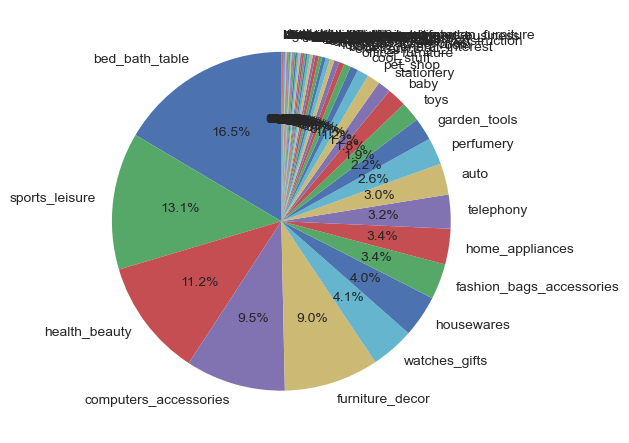

In [51]:
df_2_cat_diff_single['product_category_name'] = df_2_cat_diff_single['product_category_name_english'].apply(lambda x: x[0])
category_counts = df_2_cat_diff_single['product_category_name'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()


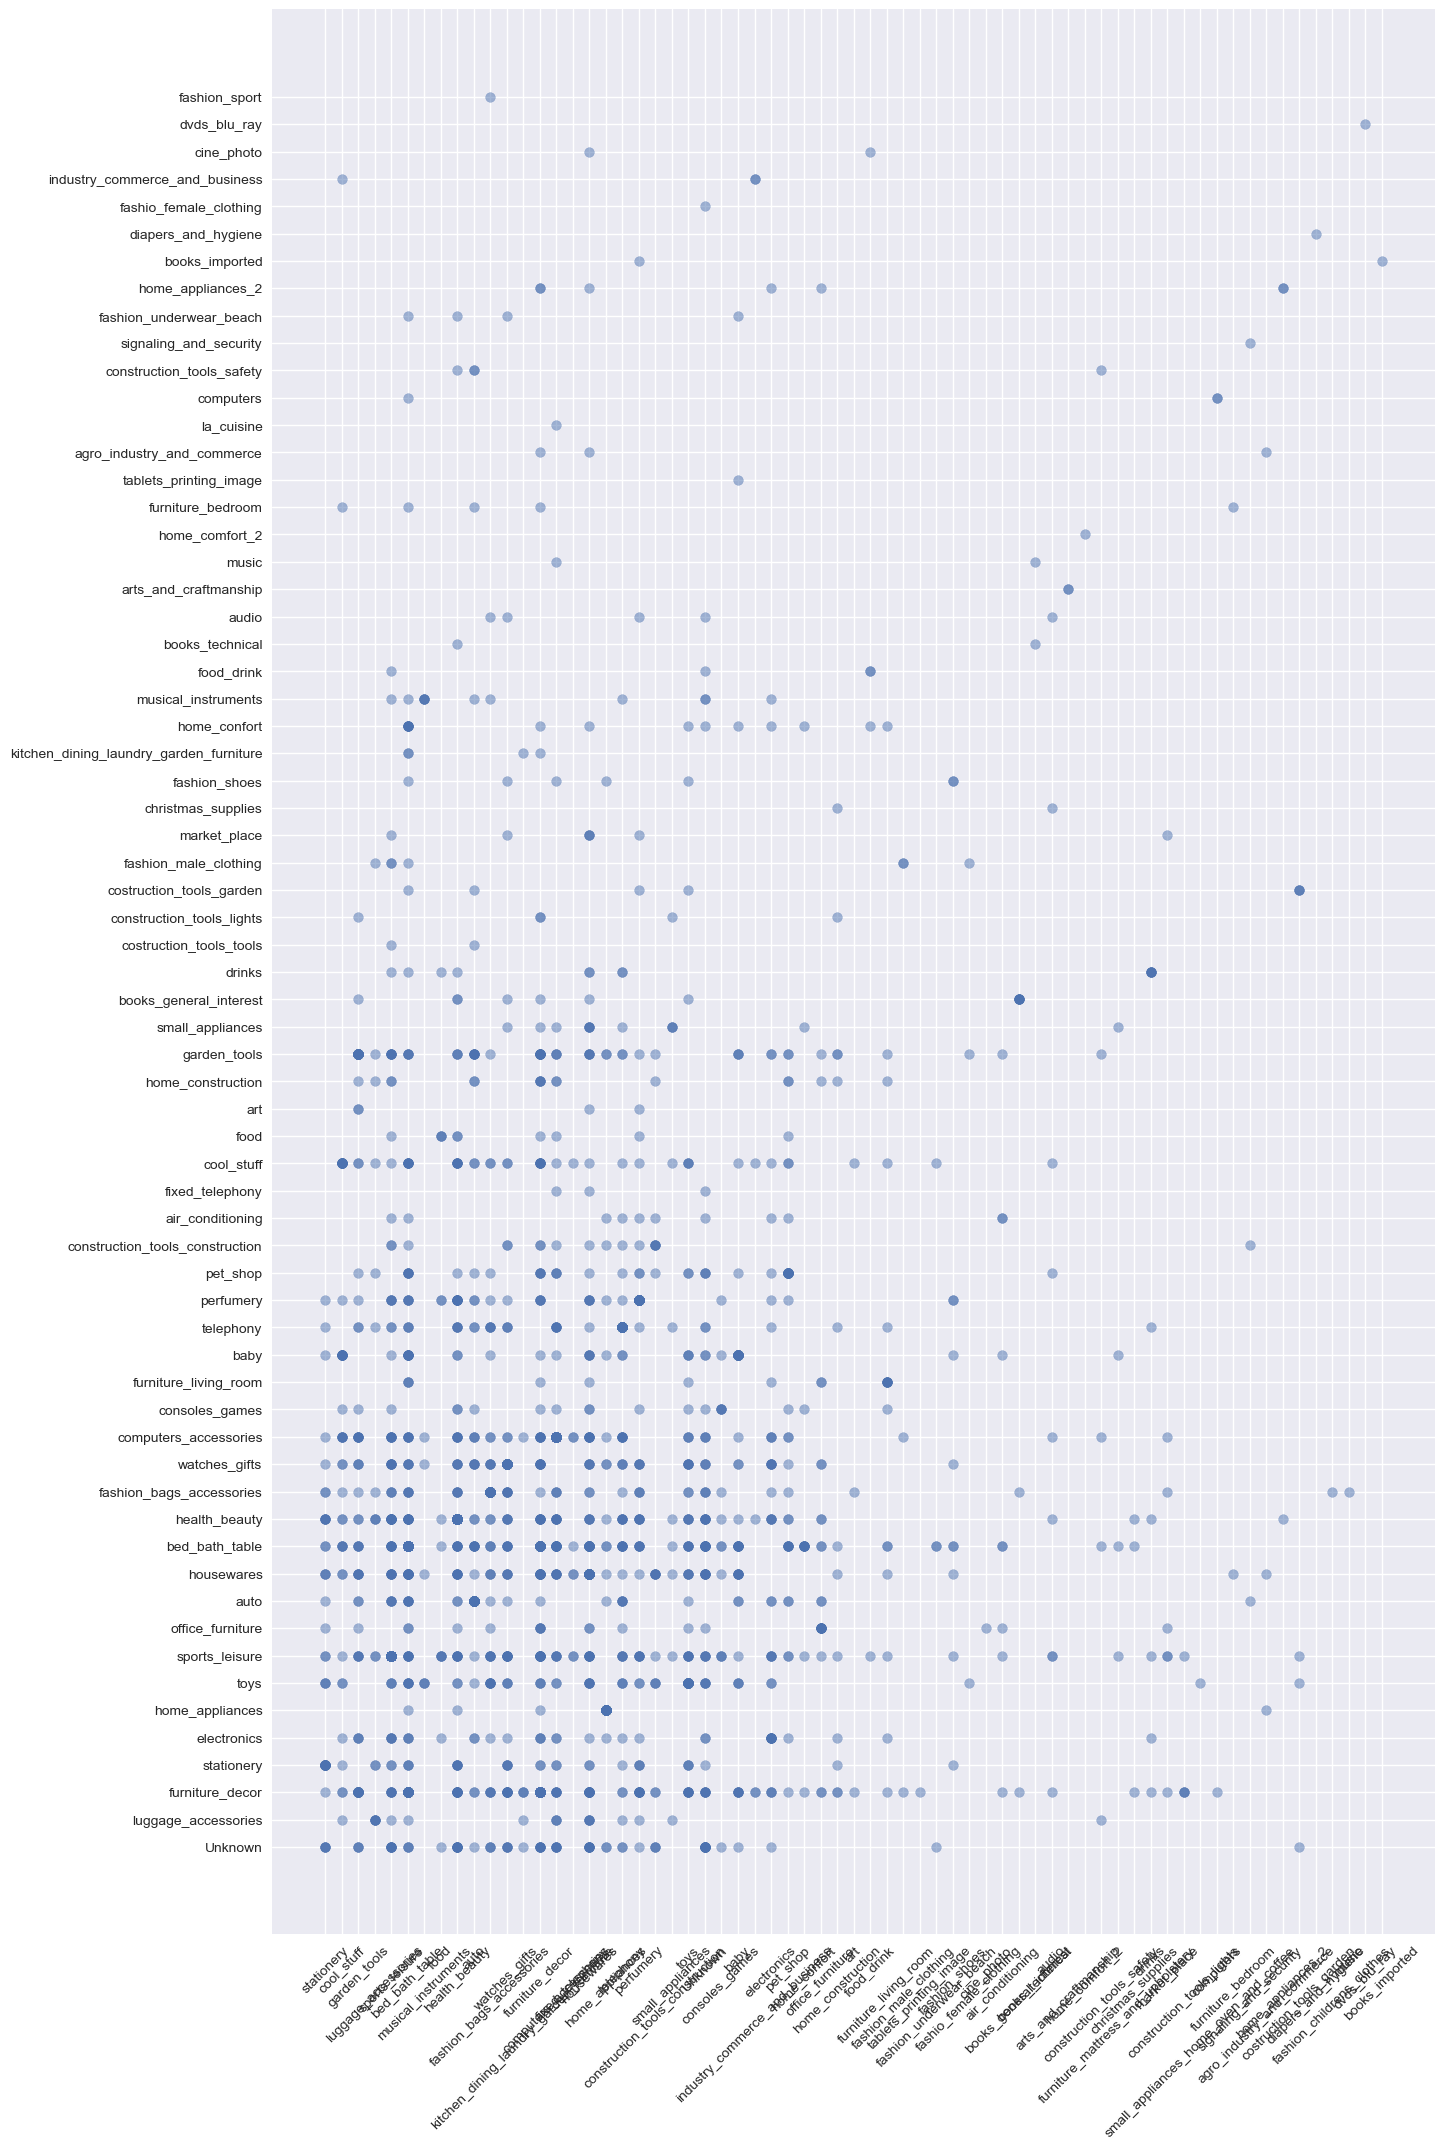

In [52]:
plt.figure(figsize=(15, 25))
# 결측값을 처리합니다. 예를 들어, 결측값을 특정 문자열로 대체할 수 있습니다.
df_2_cat_diff['first_cat'].fillna('Unknown', inplace=True)
df_2_cat_diff['second_cat'].fillna('Unknown', inplace=True)

# 데이터 타입을 문자열로 변환합니다.
df_2_cat_diff['first_cat'] = df_2_cat_diff['first_cat'].astype(str)
df_2_cat_diff['second_cat'] = df_2_cat_diff['second_cat'].astype(str)

# 이제 산점도를 그립니다.
plt.scatter(df_2_cat_diff['first_cat'], df_2_cat_diff['second_cat'], alpha=0.5)
plt.xticks(rotation=45)

plt.show()

In [53]:
# 'product_category_name_english' 열을 문자열로 변환하여 numpy 배열로 변환
categories = df_2['product_category_name_english'].astype(str).values

# 'Unknown' 값을 categories 배열에 추가
categories_with_unknown = np.append(categories, 'Unknown')

# 추가된 'Unknown'을 포함하여 고유한 값들을 추출하고 정렬
all_categories = np.sort(np.unique(categories_with_unknown))

# 카테고리 값을 숫자형 인덱스로 매핑
category_indices = {cat: i for i, cat in enumerate(all_categories)}
df_2_cat_diff['first_cat_idx'] = df_2_cat_diff['first_cat'].map(category_indices)
df_2_cat_diff['second_cat_idx'] = df_2_cat_diff['second_cat'].map(category_indices)
df_2_cat_diff

,product_category_name_english,first_cat,second_cat,first_cat_idx,second_cat_idx
customer_unique_id,,,,,
00172711b30d52eea8b313a7f2cced02,"[stationery, nan]",stationery,Unknown,64,0
004288347e5e88a27ded2bb23747066c,"[cool_stuff, luggage_accessories]",cool_stuff,luggage_accessories,20,52
004b45ec5c64187465168251cd1c9c2f,"[garden_tools, furniture_decor]",garden_tools,furniture_decor,41,38
0058f300f57d7b93c477a131a59b36c3,"[luggage_accessories, stationery]",luggage_accessories,stationery,52,64
00a39521eb40f7012db50455bf083460,"[sports_leisure, electronics]",sports_leisure,electronics,63,26
...,...,...,...,...,...
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty],health_beauty,health_beauty,42,42
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture],kitchen_dining_laundry_garden_furniture,kitchen_dining_laundry_garden_furniture,50,50
ff44401d0d8f5b9c54a47374eb48c1b8,[fashion_bags_accessories],fashion_bags_accessories,fashion_bags_accessories,28,28


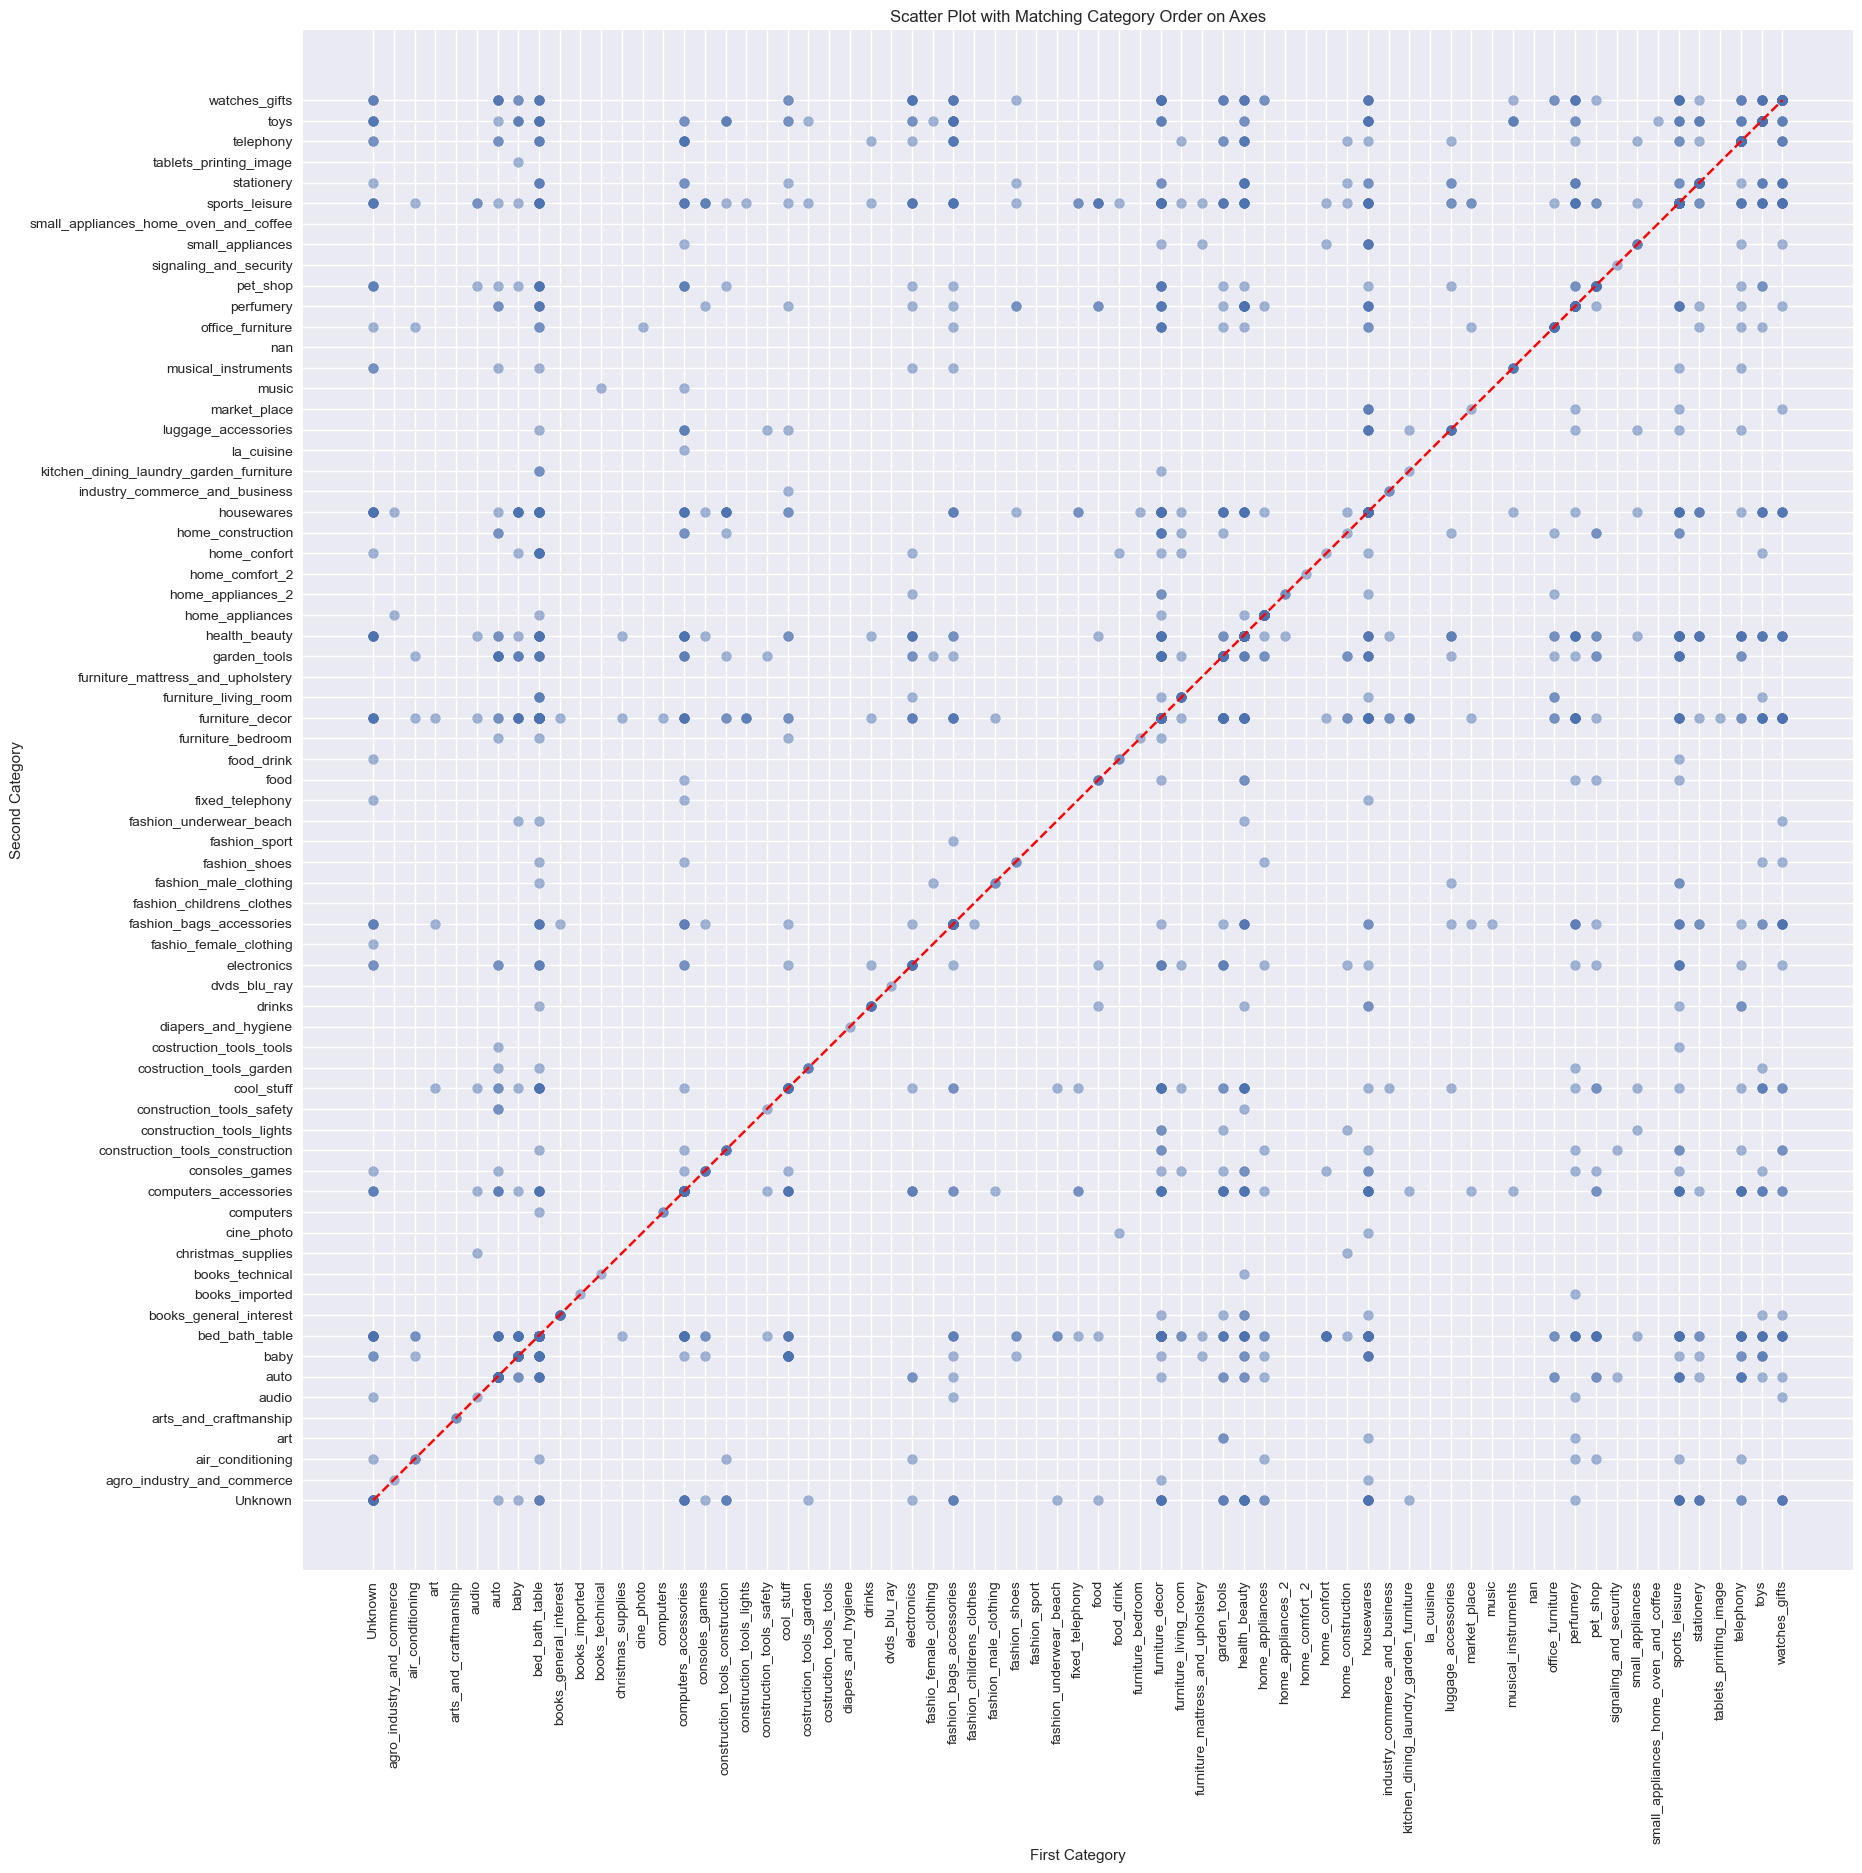

In [54]:
plt.figure(figsize=(20,20))


# x축과 y축에 동일한 카테고리 레이블 설정
plt.xticks(ticks=range(len(all_categories)), labels=all_categories, rotation=90)
plt.yticks(ticks=range(len(all_categories)), labels=all_categories)

# 산점도 그리기
plt.scatter(df_2_cat_diff['first_cat_idx'], df_2_cat_diff['second_cat_idx'], alpha=0.5)



plt.xlabel('First Category')
plt.ylabel('Second Category')
plt.title('Scatter Plot with Matching Category Order on Axes')
plt.grid(True)  # 격자 보이기

# y=x 선을 그립니다.
plt.plot(range(len(all_categories)), range(len(all_categories)), 'r--') # 'r--'는 빨간색 대시라인을 의미합니다.

plt.show()


## 3회 이상 방문자

In [55]:
df_3_cat = pd.DataFrame(df_3['product_category_name_english'].value_counts()).reset_index()
df_3_cat.columns=['product_category_name_english','count']
df_3_cat.head(30)

,product_category_name_english,count
0,bed_bath_table,180
1,sports_leisure,102
2,computers_accessories,80
3,furniture_decor,79
4,health_beauty,67
5,fashion_bags_accessories,67
6,watches_gifts,66
7,housewares,63
8,toys,51
9,telephony,44


In [56]:
# 먼저, order_purchase_timestamp로 전체 데이터를 정렬
df_sorted = df_3.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])
df_3_cat_diff = pd.DataFrame(df_3.groupby('customer_unique_id')['product_category_name_english'].unique())
df_3_cat_diff

,product_category_name_english
customer_unique_id,
02e9109b7e0a985108b43e573b6afb23,"[bed_bath_table, health_beauty]"
041caba6a63ace5818387698ea85cdb2,"[drinks, auto, telephony]"
043aee247e71edff7045664609f4d806,"[nan, bed_bath_table]"
06a52782a04f0086d16b9c22d0e29438,[home_appliances]
07b1b60bca2b6326fa2adb259ea4a55f,"[furniture_decor, stationery]"
...,...
fd8ccc89be43894d2553494c71a61fd8,"[bed_bath_table, housewares]"
fe59d5878cd80080edbd29b5a0a4e1cf,"[sports_leisure, food_drink]"
fe81bb32c243a86b2f86fbf053fe6140,"[cool_stuff, watches_gifts]"


In [57]:
df_3_cat_diff['kind'] = df_3_cat_diff['product_category_name_english'].apply(lambda x: len(x))
df_3_cat_diff

,product_category_name_english,kind
customer_unique_id,,
02e9109b7e0a985108b43e573b6afb23,"[bed_bath_table, health_beauty]",2
041caba6a63ace5818387698ea85cdb2,"[drinks, auto, telephony]",3
043aee247e71edff7045664609f4d806,"[nan, bed_bath_table]",2
06a52782a04f0086d16b9c22d0e29438,[home_appliances],1
07b1b60bca2b6326fa2adb259ea4a55f,"[furniture_decor, stationery]",2
...,...,...
fd8ccc89be43894d2553494c71a61fd8,"[bed_bath_table, housewares]",2
fe59d5878cd80080edbd29b5a0a4e1cf,"[sports_leisure, food_drink]",2
fe81bb32c243a86b2f86fbf053fe6140,"[cool_stuff, watches_gifts]",2


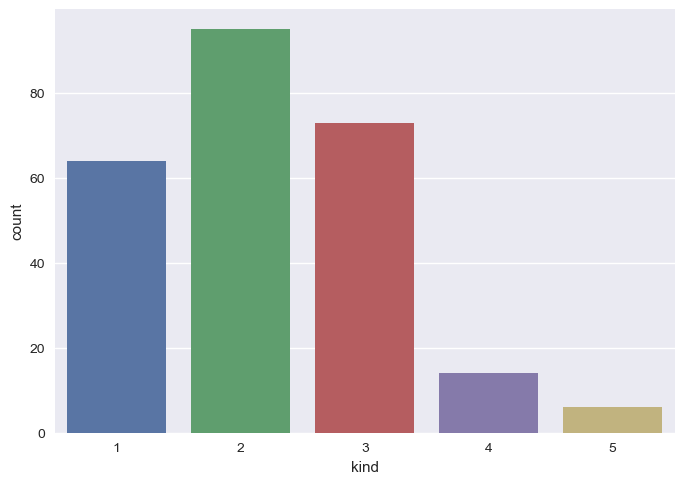

In [58]:
sns.countplot(data=df_3_cat_diff,x='kind')
plt.show()

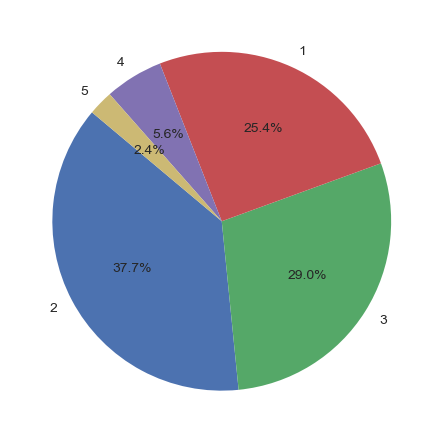

In [59]:
# 'kind' 열의 각 범주별 빈도수 계산
kind_counts = df_3_cat_diff['kind'].value_counts()

# 파이 차트 그리기
plt.pie(kind_counts, labels=kind_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

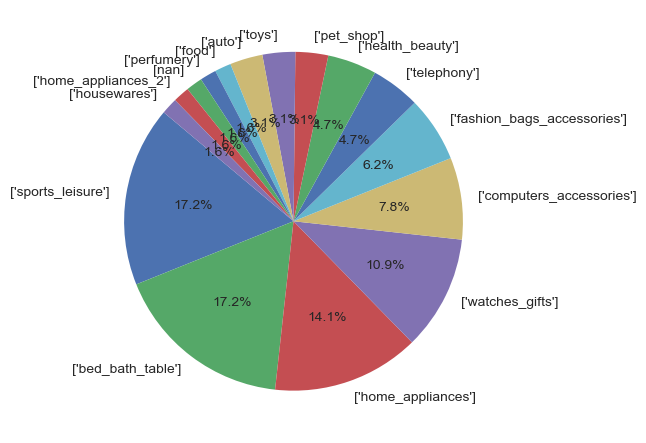

In [60]:
category_ratio = df_3_cat_diff[df_3_cat_diff['kind']==1]['product_category_name_english'].value_counts()

# 파이 차트 그리기
plt.pie(category_ratio, labels=category_ratio.index, autopct='%1.1f%%', startangle=140)
plt.show()

In [61]:
df_2kinds = df_3_cat_diff[df_3_cat_diff['kind']==2]
df_2kinds

,product_category_name_english,kind
customer_unique_id,,
02e9109b7e0a985108b43e573b6afb23,"[bed_bath_table, health_beauty]",2
043aee247e71edff7045664609f4d806,"[nan, bed_bath_table]",2
07b1b60bca2b6326fa2adb259ea4a55f,"[furniture_decor, stationery]",2
08c07c761592a71b85136aa4fe76a6f4,"[health_beauty, sports_leisure]",2
0a609db8d244100909a15d65eadf8539,"[bed_bath_table, toys]",2
...,...,...
fc719c11b4dce594f47e1f9aa739a3a2,"[sports_leisure, perfumery]",2
fd8ccc89be43894d2553494c71a61fd8,"[bed_bath_table, housewares]",2
fe59d5878cd80080edbd29b5a0a4e1cf,"[sports_leisure, food_drink]",2


In [62]:
# 새로운 열을 생성하기 위해 apply 함수와 lambda 함수 사용
df_2kinds['first_cat'] = df_2kinds['product_category_name_english'].apply(lambda x: x[0] if len(x) >= 1 else None)
df_2kinds['second_cat'] = df_2kinds['product_category_name_english'].apply(lambda x: x[1] if len(x) >= 2 else x[0] if len(x) == 1 else None)
df_2kinds

,product_category_name_english,kind,first_cat,second_cat
customer_unique_id,,,,
02e9109b7e0a985108b43e573b6afb23,"[bed_bath_table, health_beauty]",2,bed_bath_table,health_beauty
043aee247e71edff7045664609f4d806,"[nan, bed_bath_table]",2,NaN,bed_bath_table
07b1b60bca2b6326fa2adb259ea4a55f,"[furniture_decor, stationery]",2,furniture_decor,stationery
08c07c761592a71b85136aa4fe76a6f4,"[health_beauty, sports_leisure]",2,health_beauty,sports_leisure
0a609db8d244100909a15d65eadf8539,"[bed_bath_table, toys]",2,bed_bath_table,toys
...,...,...,...,...
fc719c11b4dce594f47e1f9aa739a3a2,"[sports_leisure, perfumery]",2,sports_leisure,perfumery
fd8ccc89be43894d2553494c71a61fd8,"[bed_bath_table, housewares]",2,bed_bath_table,housewares
fe59d5878cd80080edbd29b5a0a4e1cf,"[sports_leisure, food_drink]",2,sports_leisure,food_drink


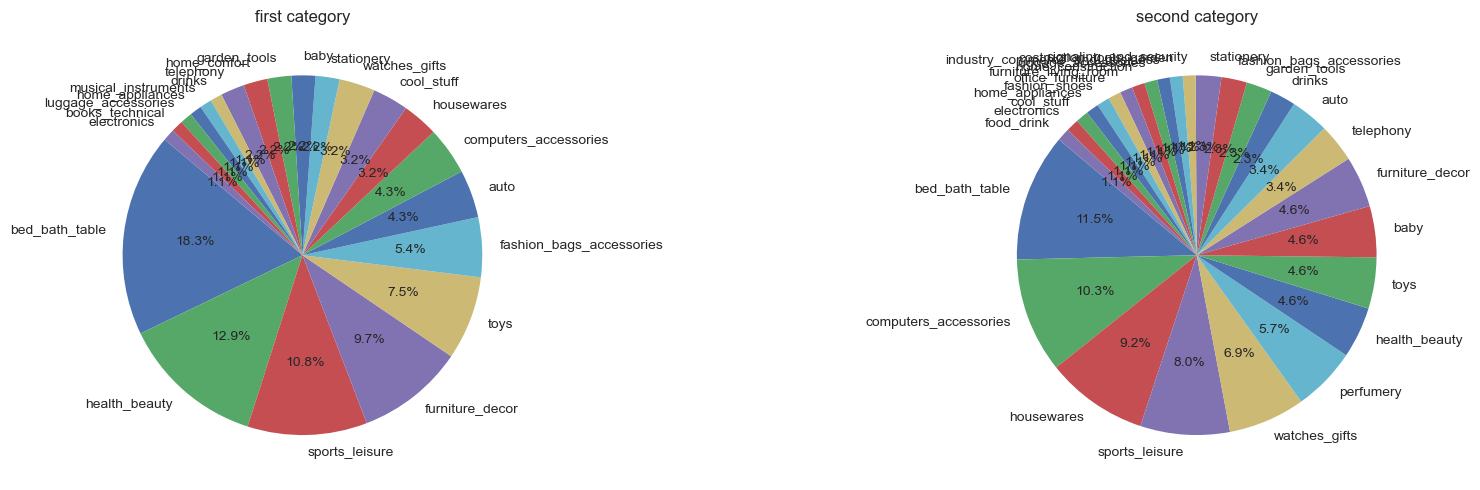

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
first = df_2kinds['first_cat'].value_counts()

# 첫 번째 서브플롯에 대한 pie 차트 그리기
axes[0].pie(first, labels=first.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('first category')  # 첫 번째 서브플롯의 제목 설정

second = df_2kinds['second_cat'].value_counts()

# 두 번째 서브플롯에 대한 pie 차트 그리기
axes[1].pie(second, labels=second.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('second category')  # 두 번째 서브플롯의 제목 설정

plt.tight_layout()  # 서브플롯들 사이에 적절한 간격 유지
plt.show()


## 1,2,3회 이상 방문자 구매품목 비교

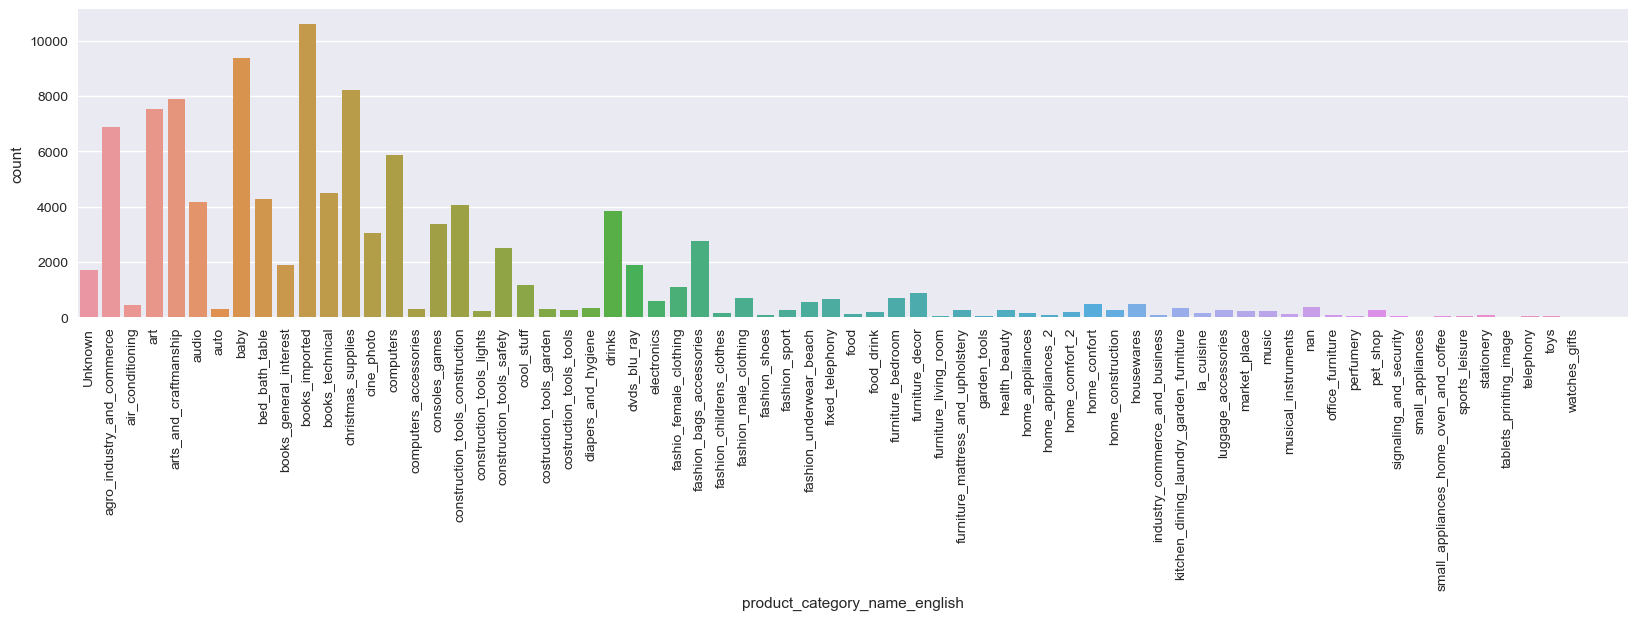

In [64]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_1,x='product_category_name_english')
plt.xticks(ticks=range(len(all_categories)),labels=all_categories, rotation=90)
plt.show()

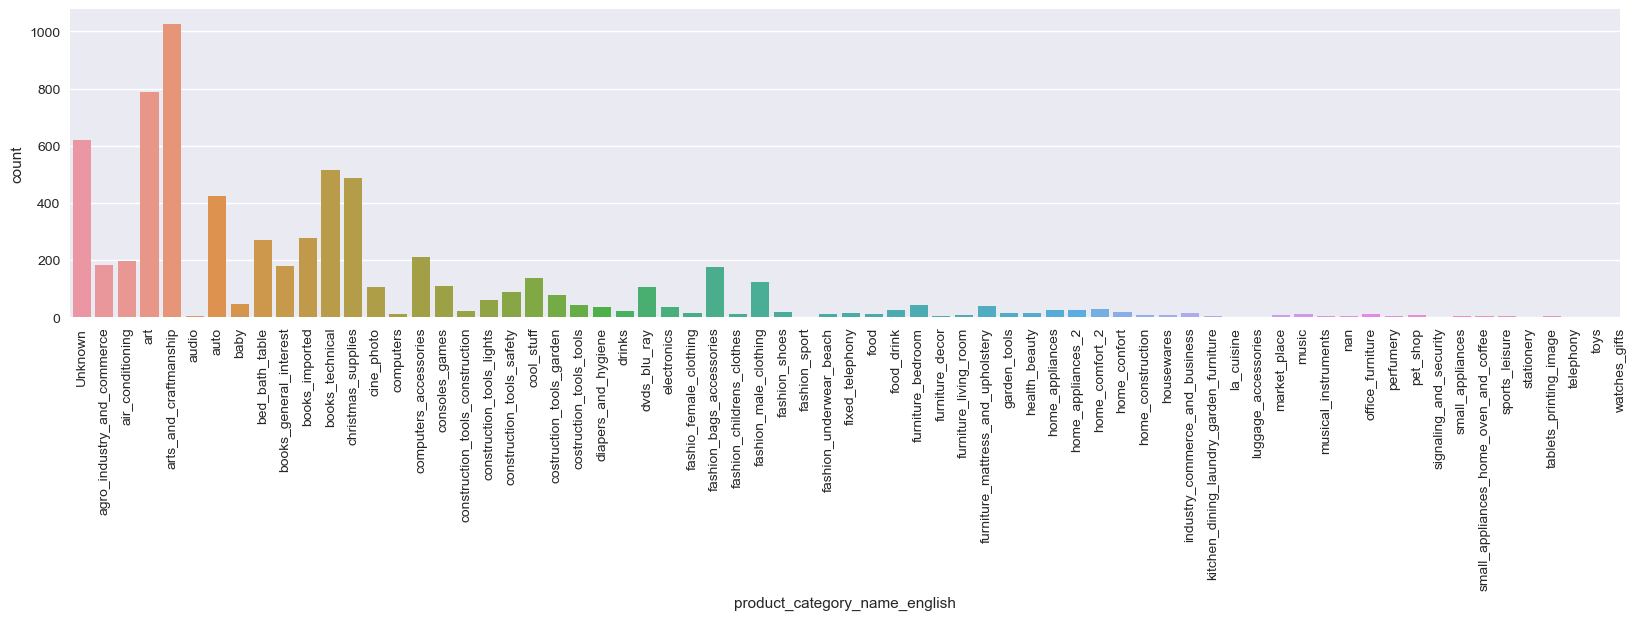

In [65]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_2,x='product_category_name_english')
plt.xticks(ticks=range(len(all_categories)),labels=all_categories, rotation=90)
plt.show()

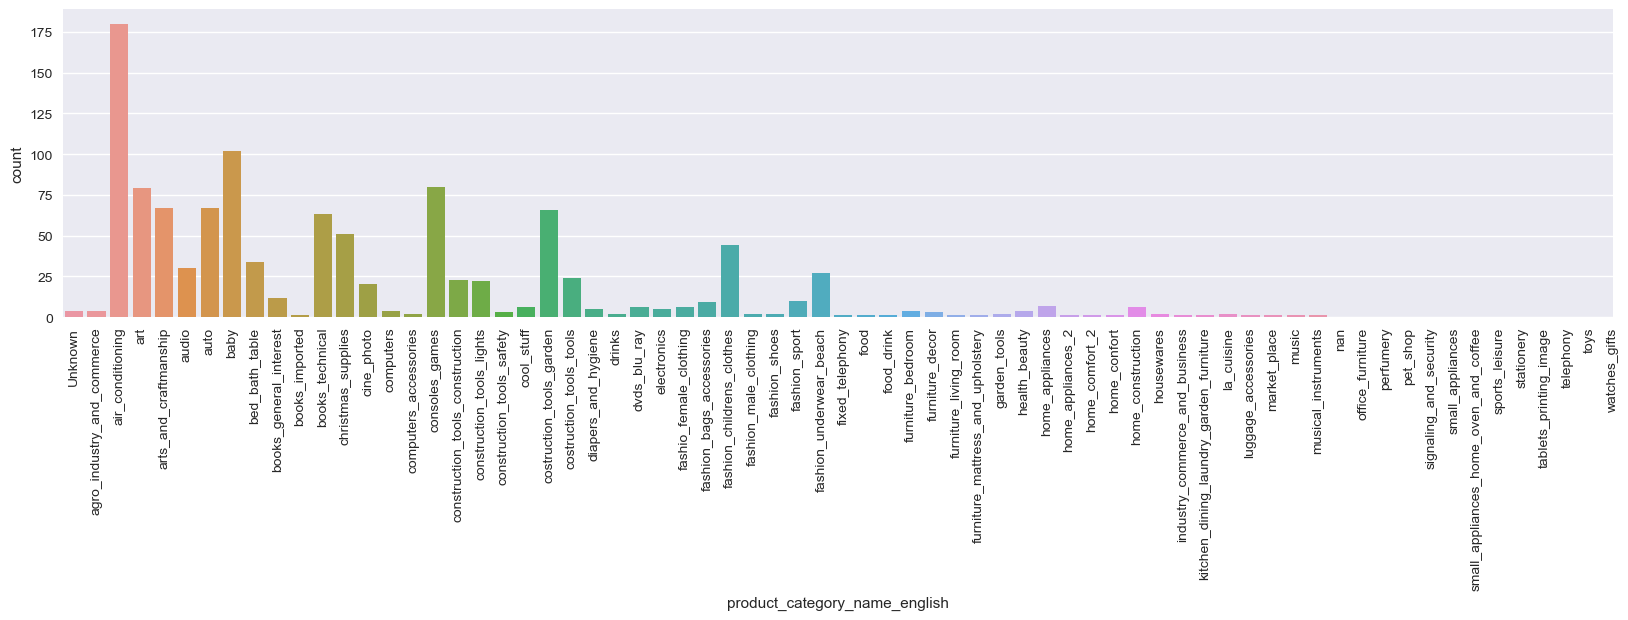

In [66]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_3,x='product_category_name_english')
plt.xticks(ticks=range(len(all_categories)),labels=all_categories, rotation=90)
plt.show()

# 거주지역

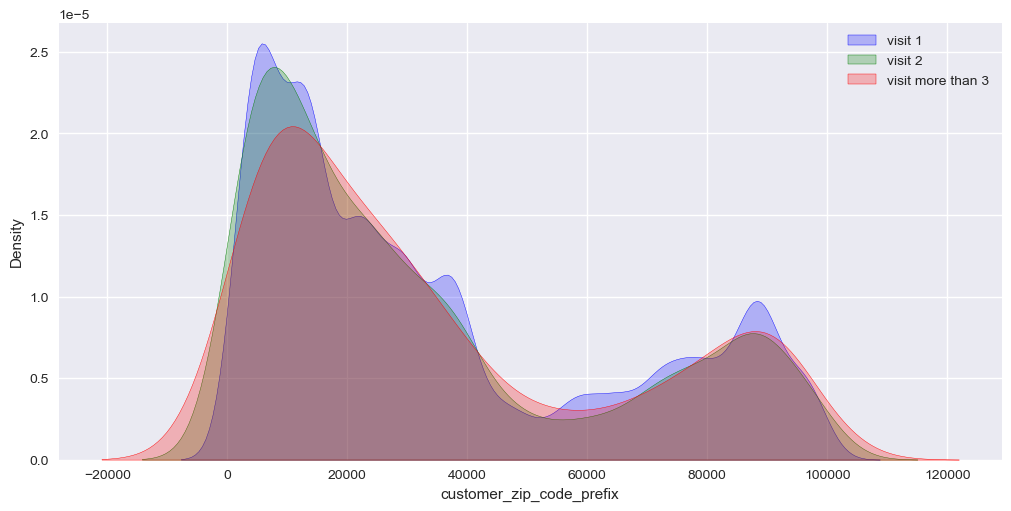

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# 각 데이터셋에 대한 kdeplot을 그립니다. 각각에 대해 label을 지정하여 범례에 나타나게 합니다.
sns.kdeplot(x='customer_zip_code_prefix', data=df_1_copy, fill=True, ax=ax, label='visit 1', color='blue')
sns.kdeplot(x='customer_zip_code_prefix', data=df_2_copy, fill=True, ax=ax, label='visit 2', color='green')
sns.kdeplot(x='customer_zip_code_prefix', data=df_3_copy, fill=True, ax=ax, label='visit more than 3', color='red')

# 범례 표시
plt.legend()

plt.show()


[가설 검정]  
H0: 지역 번호가 40000-60000 여부와 구매품목 'sports leisure'은 관련이 없다  
Ha: 지역 번호가 40000-60000 여부와 구매품목 'sports leisure'은 관련이 있다  

In [68]:
df_3_copy = df_3.copy()
df_3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 156 to 118219
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    1151 non-null   object 
 1   customer_unique_id             1151 non-null   object 
 2   customer_zip_code_prefix       1151 non-null   int64  
 3   order_id                       1151 non-null   object 
 4   order_status                   1151 non-null   object 
 5   order_purchase_timestamp       1151 non-null   object 
 6   order_approved_at              1132 non-null   object 
 7   order_delivered_customer_date  1103 non-null   object 
 8   order_estimated_delivery_date  1151 non-null   object 
 9   total_visits                   1151 non-null   int64  
 10  product_id                     1129 non-null   object 
 11  seller_id                      1129 non-null   object 
 12  price                          1129 non-null   fl

In [69]:
df_morethan_2 = df[df['total_visits']>1]
df_morethan_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,1.0,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,1.0,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,1.0,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,1.0,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,1.0,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,1.0,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor


In [70]:
df_morethan_2['is_between_40000_60000'] = np.where((df_morethan_2['customer_zip_code_prefix'] >= 40000) & (df_morethan_2['customer_zip_code_prefix'] <= 60000), 1, 0)
df_morethan_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_between_40000_60000
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,0
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,0
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,0
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0


In [71]:
df_morethan_2['is_between_30000_60000'] = np.where((df_morethan_2['customer_zip_code_prefix'] >= 30000) & (df_morethan_2['customer_zip_code_prefix'] <= 60000), 1, 0)
df_morethan_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_between_40000_60000,is_between_30000_60000
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,0,0
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,0,0
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,0,0
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1,1
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0,0


In [72]:
df_morethan_2['does_buy_sports_leisure'] = np.where((df_morethan_2['product_category_name_english']=='sports_leisure'), 1, 0)
df_morethan_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_between_40000_60000,is_between_30000_60000,does_buy_sports_leisure
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,0,0,1
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,0,0,0
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,0,0,0
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1,1,0
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0,0,0


In [73]:
df_morethan_2['does_buy_bed_bath'] = np.where((df_morethan_2['product_category_name_english']=='bed_bath_table'), 1, 0)
df_morethan_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_between_40000_60000,is_between_30000_60000,does_buy_sports_leisure,does_buy_bed_bath
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,0,0,1,0
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,brinquedos,350.0,28.0,10.0,12.0,toys,0,0,0,0
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,telefonia,300.0,17.0,4.0,12.0,telephony,0,0,0,0
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1,1,0,0
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0,0
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0,0
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,0,0,0,0
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0,0,0,0


In [74]:
# 우선 교차표를 작성
table = pd.crosstab(df_morethan_2['is_between_40000_60000'], df_morethan_2['does_buy_sports_leisure'])
table

does_buy_sports_leisure,0,1
is_between_40000_60000,,
0,6991,665
1,436,57


In [75]:
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=4.394493506165825, pvalue=0.03605516774335782, dof=1, expected_freq=array([[6977.6797153,  678.3202847],
       [ 449.3202847,   43.6797153]]))

In [76]:
df_1

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


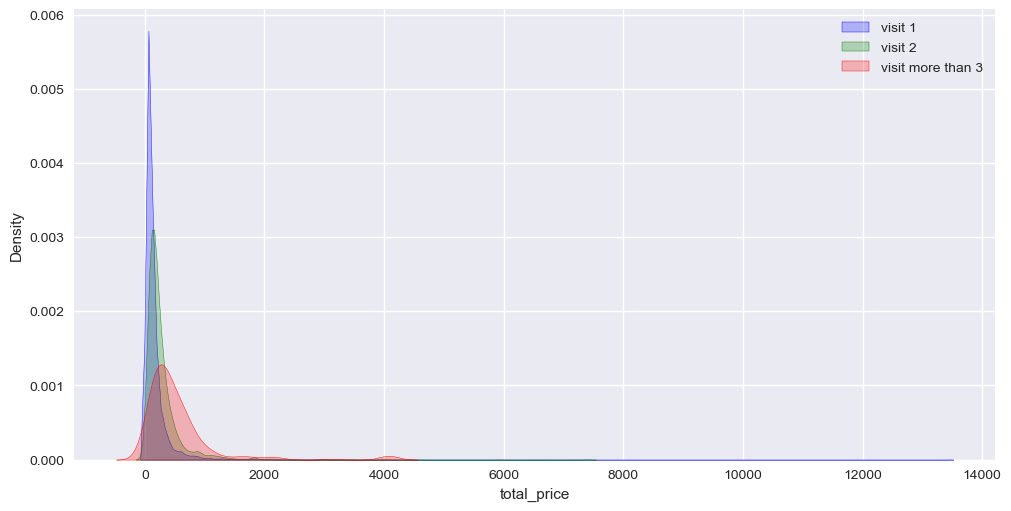

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# 각 데이터셋에 대한 kdeplot을 그립니다. 각각에 대해 label을 지정하여 범례에 나타나게 합니다.
sns.kdeplot(x='total_price', data=df_1_copy, fill=True, ax=ax, label='visit 1', color='blue')
sns.kdeplot(x='total_price', data=df_2_copy, fill=True, ax=ax, label='visit 2', color='green')
sns.kdeplot(x='total_price', data=df_3_copy, fill=True, ax=ax, label='visit more than 3', color='red')

# 범례 표시
plt.legend()

plt.show()


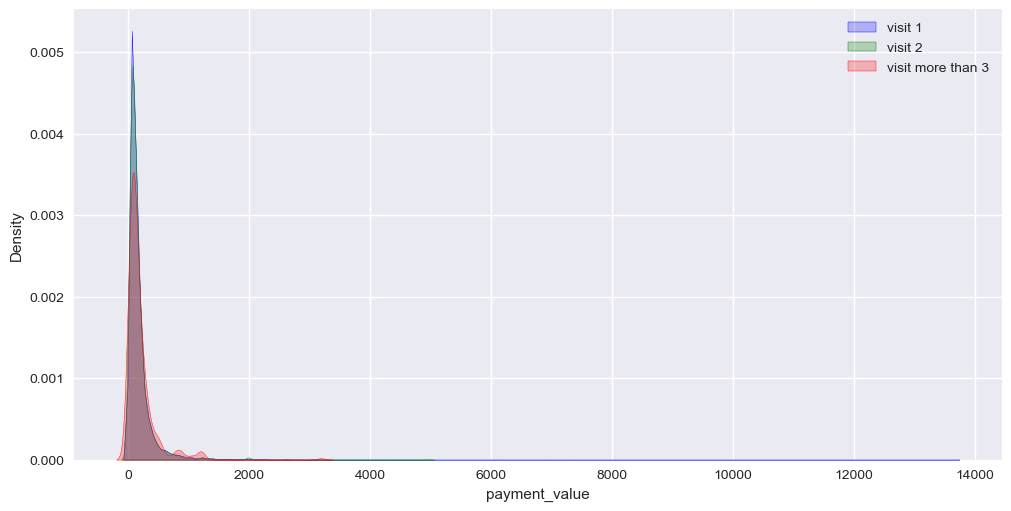

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# 각 데이터셋에 대한 kdeplot을 그립니다. 각각에 대해 label을 지정하여 범례에 나타나게 합니다.
sns.kdeplot(x='payment_value', data=df_1_copy, fill=True, ax=ax, label='visit 1', color='blue')
sns.kdeplot(x='payment_value', data=df_2_copy, fill=True, ax=ax, label='visit 2', color='green')
sns.kdeplot(x='payment_value', data=df_3_copy, fill=True, ax=ax, label='visit more than 3', color='red')

# 범례 표시
plt.legend()

plt.show()


# 배송비

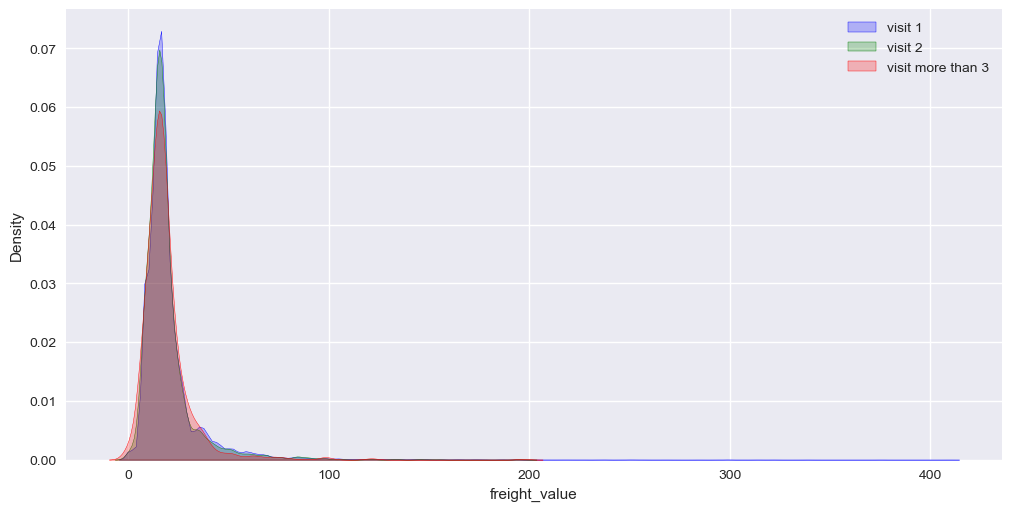

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# 각 데이터셋에 대한 kdeplot을 그립니다. 각각에 대해 label을 지정하여 범례에 나타나게 합니다.
sns.kdeplot(x='freight_value', data=df_1_copy, fill=True, ax=ax, label='visit 1', color='blue')
sns.kdeplot(x='freight_value', data=df_2_copy, fill=True, ax=ax, label='visit 2', color='green')
sns.kdeplot(x='freight_value', data=df_3_copy, fill=True, ax=ax, label='visit more than 3', color='red')

# 범례 표시
plt.legend()

plt.show()


# 지불 방식

In [80]:
df_copy = df.copy()
df_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


<Axes: xlabel='payment_type', ylabel='count'>

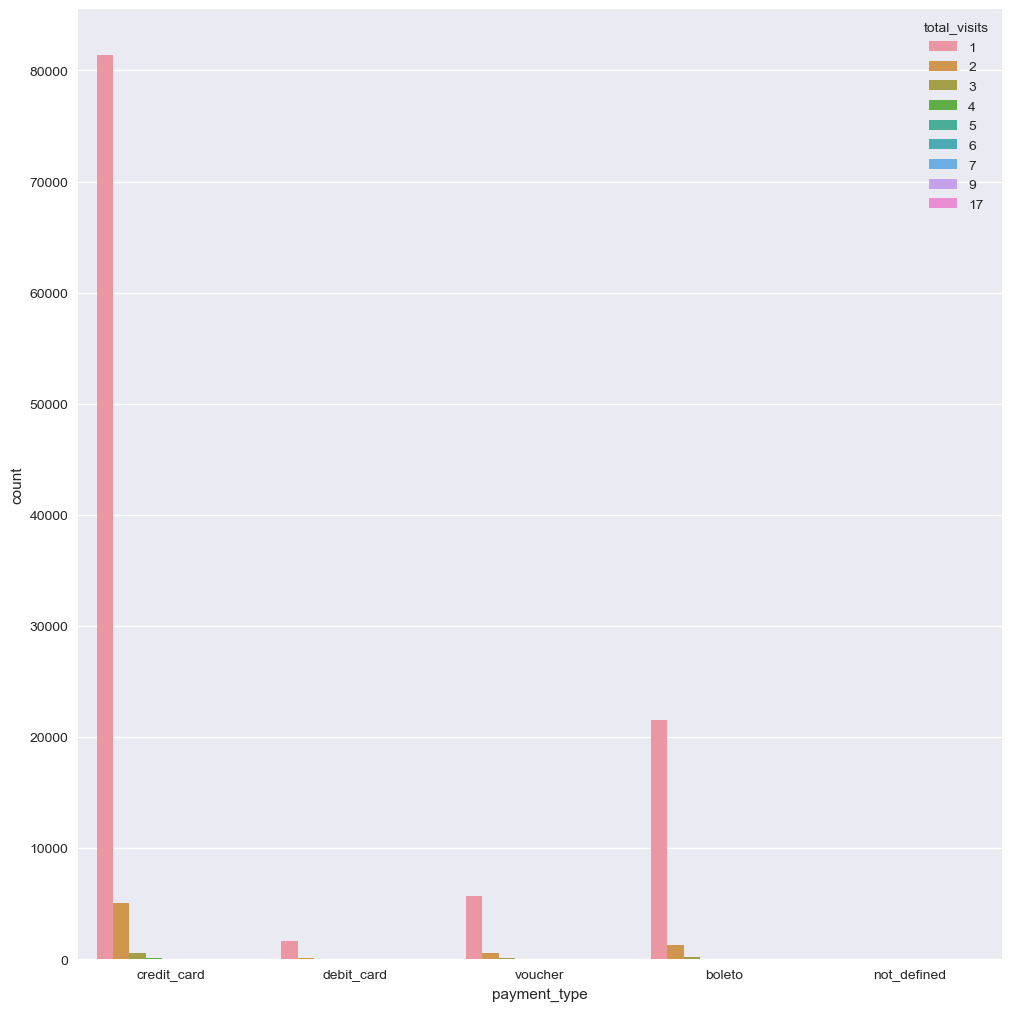

In [81]:
fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
sns.countplot(data=df_copy,x='payment_type',hue='total_visits')

# 주문 상태

In [82]:
df_2_copy

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,day_of_week
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,2
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,2
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,1
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0


<Axes: xlabel='order_status', ylabel='count'>

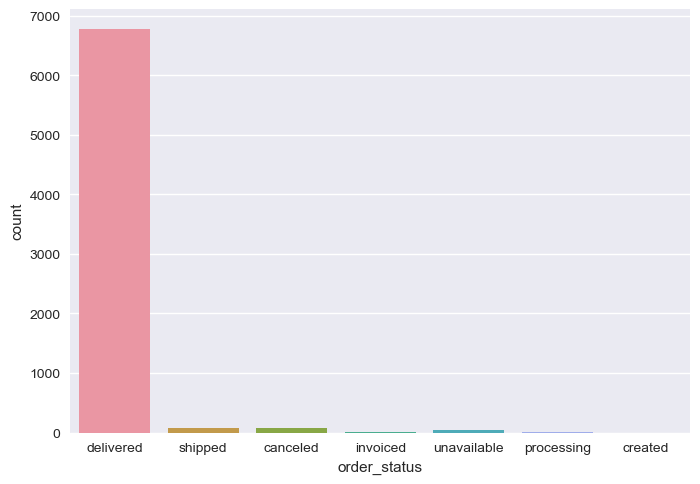

In [83]:
sns.countplot(data=df_2_copy,x='order_status')

In [84]:
df_2_avail = df_2_copy[(df_2_copy['order_status']!='canceled') & (df_2_copy['order_status']!='unavilable')]
df_2_avail

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,day_of_week
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure,2
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys,2
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony,1
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor,1
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares,1
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor,0


In [85]:
df_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,1.0,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,1.0,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,1.0,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,1.0,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,1.0,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,1.0,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor
